In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

f = h5py.File('jetImages.h5','r')
x_train = f.get("x_train").value
x_test  = f.get("x_test").value

y_train = f.get("y_train").value
y_test  = f.get("y_test").value



/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:6: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:9: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  if __name__ == '__main__':
/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/ipykernel_launcher.py:10: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  # Remove the CWD from sys.path while we load stuff.


In [2]:
#Best hyperparameters: {'dropout_rate': 0.1, 'kernel_size': (2, 2), 'learning_rate': 0.0001, 'num_conv_layers': 1, 'num_filters': 4, 'pool_size': (2, 2)}

2023-05-09 10:25:12.249369: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D
import tensorflow as tf

model_cnn = Sequential()
model_cnn.add(Conv2D(4, (2, 2), input_shape=(15, 15,1), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.1))
model_cnn.add(Flatten())
model_cnn.add(Dense(2, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=1.e-4), 
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(x_train, y_train, validation_split=0.2, epochs=100, 
                            batch_size=256, shuffle=True, verbose=1)

model_cnn.summary()

Epoch 1/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6924 - accuracy: 0.5241 - val_loss: 0.6889 - val_accuracy: 0.5487
Epoch 2/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6876 - accuracy: 0.5496 - val_loss: 0.6857 - val_accuracy: 0.5603
Epoch 3/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6846 - accuracy: 0.5611 - val_loss: 0.6832 - val_accuracy: 0.5642
Epoch 4/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.5665 - val_loss: 0.6810 - val_accuracy: 0.5682
Epoch 5/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6800 - accuracy: 0.5693 - val_loss: 0.6791 - val_accuracy: 0.5729
Epoch 6/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6781 - accuracy: 0.5749 - val_loss: 0.6774 - val_accuracy: 0.5772
Epoch 7/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6768 - accuracy: 0.5768 - val_loss: 0.6760 - val_accuracy: 0.5803

Epoch 58/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6604 - accuracy: 0.6057 - val_loss: 0.6604 - val_accuracy: 0.6095
Epoch 59/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.6075 - val_loss: 0.6603 - val_accuracy: 0.6079
Epoch 60/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6599 - accuracy: 0.6064 - val_loss: 0.6603 - val_accuracy: 0.6081
Epoch 61/100
308/308 [==============================] - 1s 2ms/step - loss: 0.6600 - accuracy: 0.6076 - val_loss: 0.6603 - val_accuracy: 0.6079
Epoch 62/100
308/308 [==============================] - 1s 3ms/step - loss: 0.6601 - accuracy: 0.6080 - val_loss: 0.6603 - val_accuracy: 0.6084
Epoch 63/100
308/308 [==============================] - 1s 3ms/step - loss: 0.6602 - accuracy: 0.6062 - val_loss: 0.6602 - val_accuracy: 0.6084
Epoch 64/100
308/308 [==============================] - 1s 3ms/step - loss: 0.6603 - accuracy: 0.6058 - val_loss: 0.6602 - val_accuracy:

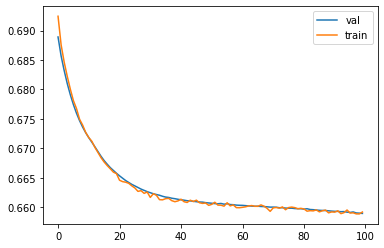

<Figure size 432x288 with 0 Axes>

In [9]:
from matplotlib import pyplot as plt
plt.plot(history_cnn.history['val_loss'], label='val')
plt.plot(history_cnn.history['loss'], label='train')
plt.legend()
plt.show()
plt.savefig('history_cnn.png')

In [10]:
predictions_cnn = model_cnn.predict(x_test)
model_cnn.save('cnn.h5')

In [7]:
from tensorflow.keras.models import load_model
import tensorflow as tf

model_cnn = load_model('cnn.h5')
predictions_cnn = model_cnn.predict(x_test)

In [8]:
from sklearn.metrics import roc_curve
fpr_cnn, tpr_cnn, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())

from sklearn.metrics import auc
auc = auc(fpr_cnn, tpr_cnn)

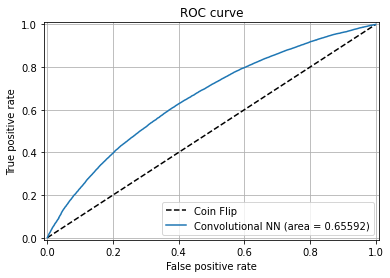

In [9]:
plt.plot([0, 1], [0, 1], 'k--', label='Coin Flip')
plt.plot(fpr_cnn, tpr_cnn, label='Convolutional NN (area = {:.5f})'.format(auc))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('ROC_curve.png')


In [10]:
predictions_cnn = model_cnn.predict(x_test)

y_pred_DD_train = model_cnn.predict(x_train)
y_pred_DD_test = model_cnn.predict(x_test)

n_bins=100
hist_range=(0.0,1.0)
plt.figure(figsize=(8,9))

plt.hist(y_pred_DD_train[:,1],bins=n_bins,range=hist_range,histtype='step' , color="green",density=True,alpha=0.4,label="Train, quark")
counts,bin_edges = np.histogram(y_pred_DD_test[:,1], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="green",label="Test, quark")

plt.hist(y_pred_DD_train[:,0],bins=n_bins,range=hist_range,histtype='step' , color="red",density=True,alpha=0.4,label="Train, gluon")
counts,bin_edges = np.histogram(y_pred_DD_test[:,0], bins=n_bins,range=hist_range,density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, counts,marker="o",linestyle="None",color="red",label="Test, gluon")

plt.xlabel("Prediction from CNN", fontsize=12)
plt.ylabel("Events",fontsize=12)
plt.legend()
plt.xlabel('CNN output')
plt.show()

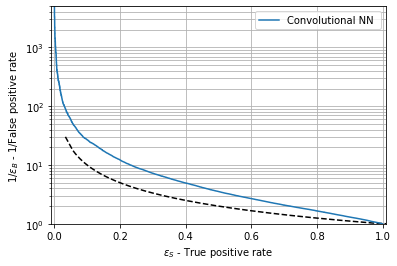

In [11]:
np.seterr(divide='ignore', invalid='ignore') # disable warning for 1/0 divisions
plt.plot(thresholds, 1/thresholds, 'k--')
plt.plot(tpr_cnn, 1/fpr_cnn, label='Convolutional NN ')
plt.gca().set(ylabel='1/$\epsilon_B$ - 1/False positive rate', xlabel='$\epsilon_S$ - True positive rate', 
              title='', xlim=(-0.01,1.01), ylim=(1,5*10**3), yscale='log')
plt.grid(True, which="both")
plt.legend();

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# assume y_true is a list of ground truth tags and y_pred is a list of predicted tags
# for a set of samples

y_true = np.argmax(y_test, axis=1) # Convert one-hot encoded labels to integer labels

# convert the predicted probabilities to predicted labels
y_pred_prob = model_cnn.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)

# calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# calculate precision
precision = precision_score(y_true, y_pred, average='macro')

# calculate recall
recall = recall_score(y_true, y_pred, average='macro')

# calculate F1-score
f1_score = f1_score(y_true, y_pred, average='macro')

# print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1_score * 100))


Accuracy: 61.35%
Precision: 61.48%
Recall: 61.35%
F1-score: 61.24%


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1_score = f1_score(y_true, y_pred)

# print the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1-score: {:.2f}%".format(f1_score * 100))


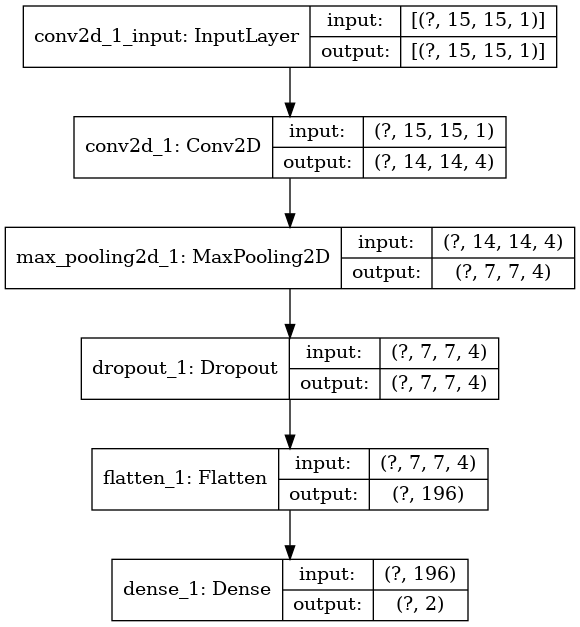

In [15]:
from tensorflow.keras.utils import plot_model

# Plot the model
plot_model(model_cnn, to_file='model.png', show_shapes=True, show_layer_names=True)

In [16]:
import hls4ml
import os
#os.environ['PATH'] = '/opt/Xilinx/Vivado/2019.2/bin:' + os.environ['PATH']
os.environ['PATH'] = '/tools/Xilinx/Vivado/2018.3/bin:' + os.environ['PATH']
#os.environ['PATH'] = '/tools/Xilinx/Vivado/2022.1/bin:' + os.environ['PATH']


hls_config = hls4ml.utils.config_from_keras_model(model_cnn, granularity='name')

# Set the precision and reuse factor for the full model
hls_config['Model']['Precision'] = 'ap_fixed<16,8>'
hls_config['Model']['ReuseFactor'] = 10

cfg = hls4ml.converters.create_config(backend='Vivado')
cfg['IOType']     = 'io_stream'
cfg['HLSConfig']  = hls_config
cfg['KerasModel'] = model_cnn
cfg['OutputDir']  = 'keras_cnn/vu13p'
#cfg['Part'] = 'xcvu9p-flga2104-2L-e'
cfg['XilinxPart'] = 'xcvu13p-flga2577-2L-e'

hls_model_aq = hls4ml.converters.keras_to_hls(cfg)
hls_model_aq.compile()



/home/santosh/.conda/envs/hls4ml/lib/python3.7/site-packages/hls4ml/converters/__init__.py:16: UserWarning: WARNING: Pytorch converter is not enabled!
  warnings.warn("WARNING: Pytorch converter is not enabled!")


Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: Input
Layer name: conv2d_1, layer type: Conv2D
  -> Activation (relu), layer name: conv2d_1
Layer name: max_pooling2d_1, layer type: MaxPooling2D
Layer name: dense_1, layer type: Dense
  -> Activation (softmax), layer name: dense_1
Interpreting Sequential
Topology:
Layer name: conv2d_1_input, layer type: InputLayer, input shapes: [[None, 15, 15, 1]], output shape: [None, 15, 15, 1]
Layer name: conv2d_1, layer type: Conv2D, input shapes: [[None, 15, 15, 1]], output shape: [None, 14, 14, 4]
Layer name: max_pooling2d_1, layer type: MaxPooling2D, input shapes: [[None, 14, 14, 4]], output shape: [None, 7, 7, 4]
Layer name: flatten_1, layer type: Reshape, input shapes: [[None, 7, 7, 4]], output shape: [None, 196]
Layer name: dense_1, layer type: Dense, input shapes: [[None, 196]], output shape: [None, 2]
Creating HLS model
Writing HLS project
Done


In [17]:
hls_model_aq.build(csim=False, synth=True, vsynth=True)


****** Vivado(TM) HLS - High-Level Synthesis from C, C++ and SystemC v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source /tools/Xilinx/Vivado/2018.3/scripts/vivado_hls/hls.tcl -notrace
INFO: [HLS 200-10] Running '/tools/Xilinx/Vivado/2018.3/bin/unwrapped/lnx64.o/vivado_hls'
INFO: [HLS 200-10] For user 'santosh' on host 'gpu1' (Linux_x86_64 version 3.10.0-1160.66.1.el7.x86_64) on Mon May 01 12:39:03 CDT 2023
INFO: [HLS 200-10] On os "CentOS Linux release 7.9.2009 (Core)"
INFO: [HLS 200-10] In directory '/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p'
INFO: [HLS 200-10] Opening project '/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj'.
INFO: [HLS 200-10] Adding design file 'firmware/myproject.cpp' to the project
INFO: [HLS 200-10] Adding test bench file 'myproject_test.cpp' to the project
INFO: [H

INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::mantissa' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:14) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::expv' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:17) automatically.
INFO: [XFORM 203-602] Inlining function 'fp_struct<double>::__signbit' into 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/FloatingPoint/hls_case_IEEE754.h:58) automatically.
INFO: [XFORM 203-602] Inlining function 'generic_cast_IEEE754<int, (ap_q_mode)6, double>' into 'generic_cast_IEEE754<int, double>' (/wrk/2018.3/continuous/2018_12_06_2405991/src/products/hls/hls_lib/hlsmath/include/Float

INFO: [HLS 200-489] Unrolling loop 'ResetAccum' (firmware/nnet_utils/nnet_dense_latency.h:101) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'Accum1' (firmware/nnet_utils/nnet_dense_latency.h:109) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 196.
INFO: [HLS 200-489] Unrolling loop 'Accum2' (firmware/nnet_utils/nnet_dense_latency.h:113) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, config6>' completely with a factor of 2.
INFO: [HLS 200-489] Unrolling loop 'Result' (firmware/nnet_utils/nnet_dense_latency.h:120) in function 'nnet::dense_wrapper<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mod

INFO: [XFORM 203-712] Applying dataflow to function 'myproject', detected/extracted 6 process function(s): 
	 'Block__proc'
	 'nnet::conv_2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 1u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, config2>'
	 'nnet::relu<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, relu_config3>'
	 'nnet::pooling2d_cl<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, config4>'
	 'nnet::dense<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 4u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, config6>'
	 'nnet::softmax<nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, nnet::array<ap_fixed<16, 6, (ap_q_mode)5, (ap_o_mode)3, 0>, 2u>, softmax_config7>'.
INFO: [XFORM 203-401] Performing if-conversion on hyperblock from (firmwar

INFO: [SCHED 204-61] Pipelining loop 'ReadInputHeight_ReadInputWidth'.
INFO: [SCHED 204-61] Pipelining result : Target II = 1, Final II = 1, Depth = 3.
INFO: [SCHED 204-11] Finished scheduling.
INFO: [HLS 200-111]  Elapsed time: 0.14 seconds; current allocated memory: 387.435 MB.
INFO: [BIND 205-100] Starting micro-architecture generation ...
INFO: [BIND 205-101] Performing variable lifetime analysis.
INFO: [BIND 205-101] Exploring resource sharing.
INFO: [BIND 205-101] Binding ...
INFO: [BIND 205-100] Starting global binding ...
INFO: [BIND 205-100] Finished micro-architecture generation.
INFO: [HLS 200-111]  Elapsed time: 0.14 seconds; current allocated memory: 388.086 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-42] -- Implementing module 'relu_array_array_ap_fixed_4u_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SCHED 204-11] Starting scheduling ...
INFO: [SCHED 2

INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'relu_array_array_ap_fixed_4u_relu_config3_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [RTGEN 206-100] Finished creating RTL model for 'relu_array_array_ap_fixed_4u_relu_config3_s'.
INFO: [HLS 200-111]  Elapsed time: 0.41 seconds; current allocated memory: 430.053 MB.
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [HLS 200-10] -- Generating RTL for module 'shift_line_buffer_array_ap_fixed_4u_config4_s' 
INFO: [HLS 200-10] ----------------------------------------------------------------
INFO: [SYN 201-210] Renamed object name 'shift_line_buffer_array_ap_fixed_4u_config4_s_line_buffer_Array_V_1_0_0' to 'shift_line_buffer_array_ap_fixed_4u_config4_s_line_buffercud' due to the length limit 60
INFO: [SYN 201-210] Renamed object name 'shift_line_buffer_array_ap_fixed_4u_

INFO: [HLS 200-111] Finished generating all RTL models Time (s): cpu = 00:00:58 ; elapsed = 00:01:07 . Memory (MB): peak = 1117.184 ; gain = 592.004 ; free physical = 77385 ; free virtual = 94304
INFO: [SYSC 207-301] Generating SystemC RTL for myproject.
INFO: [VHDL 208-304] Generating VHDL RTL for myproject.
INFO: [VLOG 209-307] Generating Verilog RTL for myproject.
***** C/RTL SYNTHESIS COMPLETED IN 0h1m5s *****
***** VIVADO SYNTHESIS *****

****** Vivado v2018.3 (64-bit)
  **** SW Build 2405991 on Thu Dec  6 23:36:41 MST 2018
  **** IP Build 2404404 on Fri Dec  7 01:43:56 MST 2018
    ** Copyright 1986-2018 Xilinx, Inc. All Rights Reserved.

source vivado_synth.tcl
# add_files myproject_prj/solution1/syn/vhdl
# synth_design -top myproject -part xcvu13p-flga2577-2L-e
Command: synth_design -top myproject -part xcvu13p-flga2577-2L-e
Starting synth_design
Attempting to get a license for feature 'Synthesis' and/or device 'xcvu13p'
INFO: [Common 17-349] Got license for feature 'Synthesis'

INFO: [Synth 8-256] done synthesizing module 'dense_wrapper_ap_fixed_ap_fixed_16_6_5_3_0_config6_s' (11#1) [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/dense_wrapper_ap_fixed_ap_fixed_16_6_5_3_0_config6_s.vhd:217]
INFO: [Synth 8-256] done synthesizing module 'dense_array_array_ap_fixed_16_6_5_3_0_2u_config6_s' (12#1) [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/dense_array_array_ap_fixed_16_6_5_3_0_2u_config6_s.vhd:45]
INFO: [Synth 8-3491] module 'softmax_array_array_ap_fixed_2u_softmax_config7_s' declared at '/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/softmax_array_array_ap_fixed_2u_softmax_config7_s.vhd:12' bound to instance 'softmax_array_array_ap_fixed_2u_softmax_config7_U0' of component 'softmax_array_array_ap_fixed_2u_softmax_config7_s' [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution

INFO: [Synth 8-256] done synthesizing module 'fifo_w16_d49_A' (21#1) [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/fifo_w16_d49_A.vhd:69]
INFO: [Synth 8-3491] module 'fifo_w16_d49_A' declared at '/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/fifo_w16_d49_A.vhd:50' bound to instance 'layer4_out_V_data_1_V_U' of component 'fifo_w16_d49_A' [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/myproject.vhd:783]
INFO: [Synth 8-3491] module 'fifo_w16_d49_A' declared at '/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/fifo_w16_d49_A.vhd:50' bound to instance 'layer4_out_V_data_2_V_U' of component 'fifo_w16_d49_A' [/home/santosh/fastml/fastml2023/R4jets/50_75GeV/keras_cnn/vu13p/myproject_prj/solution1/syn/vhdl/myproject.vhd:796]
INFO: [Synth 8-3491] module 'fifo_w16_d49_A' declared at '/home/santosh/

---------------------------------------------------------------------------------
Finished Synthesize : Time (s): cpu = 00:00:03 ; elapsed = 00:00:05 . Memory (MB): peak = 1632.066 ; gain = 179.758 ; free physical = 76707 ; free virtual = 93927
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Finished Constraint Validation : Time (s): cpu = 00:00:04 ; elapsed = 00:00:05 . Memory (MB): peak = 1632.066 ; gain = 179.758 ; free physical = 76719 ; free virtual = 93938
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Loading Part and Timing Information
---------------------------------------------------------------------------------
Loading part: xcvu13p-flga2577-2L-e
INFO: [Synth 8-6742] Reading net delay rules and data
---------------------------------------

Part Resources:
DSPs: 12288 (col length:96)
BRAMs: 5376 (col length: RAMB18 384 RAMB36 192)
---------------------------------------------------------------------------------
Finished Part Resource Summary
---------------------------------------------------------------------------------
No constraint files found.
---------------------------------------------------------------------------------
Start Cross Boundary and Area Optimization
---------------------------------------------------------------------------------
INFO: [Synth 8-5546] ROM "exitcond_flatten_fu_1019_p2" won't be mapped to RAM because it is too sparse
INFO: [Synth 8-5545] ROM "tmp_16_fu_1476_p2" won't be mapped to RAM because address size (32) is larger than maximum supported(25)
INFO: [Synth 8-5545] ROM "tmp_12_fu_1071_p2" won't be mapped to RAM because address size (32) is larger than maximum supported(25)
INFO: [Synth 8-5545] ROM "tmp_17_fu_1542_p2" won't be mapped to RAM because address size (32) is larger than maxim

DSP Report: operator r_V_4_183_1_fu_2361_p2 is absorbed into DSP r_V_4_183_1_fu_2361_p2.
DSP Report: Generating DSP r_V_4_162_1_fu_2347_p2, operation Mode is: A*(B:0x3ff45).
DSP Report: operator r_V_4_162_1_fu_2347_p2 is absorbed into DSP r_V_4_162_1_fu_2347_p2.
DSP Report: Generating DSP r_V_4_163_1_fu_2402_p2, operation Mode is: A*(B:0x3ff0a).
DSP Report: operator r_V_4_163_1_fu_2402_p2 is absorbed into DSP r_V_4_163_1_fu_2402_p2.
DSP Report: Generating DSP r_V_4_166_1_fu_2250_p2, operation Mode is: A*(B:0x3ff5e).
DSP Report: operator r_V_4_166_1_fu_2250_p2 is absorbed into DSP r_V_4_166_1_fu_2250_p2.
DSP Report: Generating DSP r_V_4_186_1_fu_2404_p2, operation Mode is: A*(B:0x3ff27).
DSP Report: operator r_V_4_186_1_fu_2404_p2 is absorbed into DSP r_V_4_186_1_fu_2404_p2.
DSP Report: Generating DSP r_V_4_157_1_fu_2492_p2, operation Mode is: A*(B:0xc9).
DSP Report: operator r_V_4_157_1_fu_2492_p2 is absorbed into DSP r_V_4_157_1_fu_2492_p2.
DSP Report: Generating DSP r_V_4_72_1_fu_248

DSP Report: Generating DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2, operation Mode is: A2*B2.
DSP Report: register grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/invert_table2_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_shbi_rom_U/q0_reg is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: register grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_res_0_V_reg_282_reg is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: operator grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2 is absorbed into DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_fu_150_p2.
DSP Report: Generating DSP grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/r_V_2_1_fu_151_p2, operation Mode is: A2*B2.
DSP Rep

INFO: [Synth 8-3886] merging instance 'layer2_out_V_data_0_V_U/q_tmp_reg[0]' (FDRE) to 'layer2_out_V_data_0_V_U/q_tmp_reg[1]'
INFO: [Synth 8-3333] propagating constant 0 across sequential element (layer2_out_V_data_0_V_U/\q_tmp_reg[1] )
INFO: [Synth 8-3886] merging instance 'layer2_out_V_data_3_V_U/q_tmp_reg[0]' (FDRE) to 'layer2_out_V_data_3_V_U/q_tmp_reg[1]'
INFO: [Synth 8-3333] propagating constant 0 across sequential element (layer2_out_V_data_3_V_U/\q_tmp_reg[1] )
INFO: [Synth 8-3886] merging instance 'layer2_out_V_data_2_V_U/q_tmp_reg[0]' (FDRE) to 'layer2_out_V_data_2_V_U/q_tmp_reg[1]'
INFO: [Synth 8-3333] propagating constant 0 across sequential element (layer2_out_V_data_2_V_U/\q_tmp_reg[1] )
INFO: [Synth 8-3886] merging instance 'layer2_out_V_data_1_V_U/q_tmp_reg[0]' (FDRE) to 'layer2_out_V_data_1_V_U/q_tmp_reg[1]'
INFO: [Synth 8-3333] propagating constant 0 across sequential element (layer2_out_V_data_1_V_U/\q_tmp_reg[1] )
----------------------------------------------------

INFO: [Synth 8-6837] The timing for the instance softmax_array_array_ap_fixed_2u_softmax_config7_U0/i_2_0/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sg8j_rom_U/q0_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance softmax_array_array_ap_fixed_2u_softmax_config7_U0/i_2_1/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sg8j_rom_U/q1_reg (implemented as a Block RAM) might be sub-optimal as no optional output register could be merged into the block ram. Providing additional output register may help in improving timing.
INFO: [Synth 8-6837] The timing for the instance layer2_out_V_data_0_V_U/i_2_8/mem_reg_bram_0 (implemented as 

---------------------------------------------------------------------------------
Finished Technology Mapping : Time (s): cpu = 00:00:39 ; elapsed = 00:01:00 . Memory (MB): peak = 2669.371 ; gain = 1217.062 ; free physical = 75561 ; free virtual = 92897
---------------------------------------------------------------------------------

Report RTL Partitions: 
+-+--------------+------------+----------+
| |RTL Partition |Replication |Instances |
+-+--------------+------------+----------+
+-+--------------+------------+----------+
---------------------------------------------------------------------------------
Start IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
Start Flattening Before IO Insertion
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------
F

---------------------------------------------------------------------------------
Finished IO Insertion : Time (s): cpu = 00:00:40 ; elapsed = 00:01:02 . Memory (MB): peak = 2669.371 ; gain = 1217.062 ; free physical = 75556 ; free virtual = 92892
---------------------------------------------------------------------------------

Report Check Netlist: 
+------+------------------+-------+---------+-------+------------------+
|      |Item              |Errors |Warnings |Status |Description       |
+------+------------------+-------+---------+-------+------------------+
|1     |multi_driven_nets |      0|        0|Passed |Multi driven nets |
+------+------------------+-------+---------+-------+------------------+
---------------------------------------------------------------------------------
Start Renaming Generated Instances
---------------------------------------------------------------------------------
---------------------------------------------------------------------------------


INFO: [Netlist 29-17] Analyzing 1262 Unisim elements for replacement
INFO: [Netlist 29-28] Unisim Transformation completed in 1 CPU seconds
INFO: [Project 1-570] Preparing netlist for logic optimization
INFO: [Opt 31-138] Pushed 0 inverter(s) to 0 load pin(s).
INFO: [Opt 31-422] The CLOCK_DOMAINS attribute on the BRAM cell softmax_array_array_ap_fixed_2u_softmax_config7_U0/grp_softmax_latency_array_array_ap_fixed_2u_softmax_config7_s_fu_56/exp_table1_U/softmax_latency_array_array_ap_fixed_2u_softmax_config7_sg8j_rom_U/q0_reg has been changed from INDEPENDENT to COMMON to match the clocking topology used for the BRAM.
Netlist sorting complete. Time (s): cpu = 00:00:00 ; elapsed = 00:00:00 . Memory (MB): peak = 2861.066 ; gain = 0.000 ; free physical = 75358 ; free virtual = 92718
INFO: [Project 1-111] Unisim Transformation Summary:
  A total of 329 instances were transformed.
  BUFG => BUFGCE: 1 instances
  DSP48E2 => DSP48E2 (DSP_ALU, DSP_A_B_DATA, DSP_C_DATA, DSP_MULTIPLIER, DSP_M_DAT

{'EstimatedClockPeriod': '4.321',
 'BestLatency': '233',
 'WorstLatency': '233',
 'IntervalMin': '229',
 'IntervalMax': '229',
 'BRAM_18K': '14',
 'DSP48E': '307',
 'FF': '5756',
 'LUT': '15103',
 'URAM': '0',
 'AvailableBRAM_18K': '5376',
 'AvailableDSP48E': '12288',
 'AvailableFF': '3456000',
 'AvailableLUT': '1728000',
 'AvailableURAM': '1280'}

In [18]:
from keras.models import model_from_json
json_model = model_cnn.to_json()
with open('autoQKeras_cnn.json','w') as aFile:
    aFile.write(json_model)

Using TensorFlow backend.


In [19]:
y_predict_hls4ml_aq = hls_model_aq.predict(x_test)

In [20]:
y_predict = model_cnn.predict(x_test)
y_predict

array([[0.6391037 , 0.3608963 ],
       [0.64044917, 0.3595509 ],
       [0.575041  , 0.424959  ],
       ...,
       [0.55663633, 0.44336367],
       [0.5994264 , 0.40057355],
       [0.6148511 , 0.3851489 ]], dtype=float32)

In [21]:
from sklearn.metrics import accuracy_score

accuracy_keras  = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict,axis=1)))
accuracy_hls4ml = float(accuracy_score (np.argmax(y_test,axis=1), np.argmax(y_predict_hls4ml_aq,axis=1)))

print("Accuracy AutoQ Keras:  {}".format(accuracy_keras))
print("Accuracy AutoQ hls4ml: {}".format(accuracy_hls4ml))

Accuracy AutoQ Keras:  0.6115039931719808
Accuracy AutoQ hls4ml: 0.6081814302261781


In [22]:
from sklearn.metrics import roc_curve
fpr0, tpr0, thresholds = roc_curve(y_test.ravel(), predictions_cnn.ravel())
#fpr1, tpr1, thresholds = roc_curve(y_test.ravel(), predictions_q.ravel())
fpr2, tpr2, thresholds = roc_curve(y_test.ravel(), y_predict_hls4ml_aq.ravel())

In [23]:
from sklearn.metrics import auc
auc0 = auc(fpr0, tpr0)
#auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)

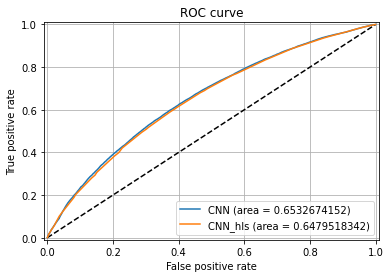

In [24]:
%matplotlib inline
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr0, tpr0, label='CNN (area = {:.10f})'.format(auc0))
#plt.plot(fpr1, tpr1, label='CNN_quantized (area = {:.3f})'.format(auc1))
plt.plot(fpr2, tpr2, label='CNN_hls (area = {:.10f})'.format(auc2))
plt.gca().set(xlabel='False positive rate', ylabel='True positive rate', title='ROC curve', xlim=(-0.01,1.01), ylim=(-0.01,1.01))
plt.grid(True, which="both")
plt.legend(loc='lower right');
plt.savefig('qgTaggerPerformance.png')

In [25]:
hls4ml.report.read_vivado_report('keras_cnn/vu13p')

Found 1 solution(s) in keras_cnn/vu13p/myproject_prj.
Reports for solution "solution1":

C simulation report not found.
SYNTHESIS REPORT:
== Vivado HLS Report for 'myproject'
* Date:           Mon May  1 12:40:07 2023

* Version:        2018.3 (Build 2405991 on Thu Dec 06 23:56:15 MST 2018)
* Project:        myproject_prj
* Solution:       solution1
* Product family: virtexuplus
* Target device:  xcvu13p-flga2577-2L-e


== Performance Estimates
+ Timing (ns): 
    * Summary: 
    +--------+-------+----------+------------+
    |  Clock | Target| Estimated| Uncertainty|
    +--------+-------+----------+------------+
    |ap_clk  |   5.00|     4.321|        0.62|
    +--------+-------+----------+------------+

+ Latency (clock cycles): 
    * Summary: 
    +-----+-----+-----+-----+----------+
    |  Latency  |  Interval | Pipeline |
    | min | max | min | max |   Type   |
    +-----+-----+-----+-----+----------+
    |  233|  233|  229|  229| dataflow |
    +-----+-----+-----+-----+------